In [93]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

## Part1

In [94]:
df=pd.read_csv("winequality-red.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [95]:

df['quality new'] = df['quality'].apply(lambda x: 0 if x < 7 else 1)

df.drop(['quality'],axis=1,inplace=True)


## Part 2:Preprocessing


In [96]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality new             0
dtype: int64

In [97]:
def remove_outliers_zscore(df, features, z_score_threshold=5):
    for feature in features:
        mean_value = df[feature].mean()
        std_dev = df[feature].std()

        df[f'{feature}_z_score'] = (df[feature] - mean_value) / std_dev

        outliers = df[abs(df[f'{feature}_z_score']) > z_score_threshold]
        df = df[abs(df[f'{feature}_z_score']) <= z_score_threshold]

        print("Number of outliers removed for ",feature,":", len(outliers))
        print("Z-Score Threshold:", z_score_threshold)

    return df.drop(columns=[f'{feature}_z_score' for feature in features])

# Assuming 'df' is your DataFrame
list_of_features = df.columns.tolist()
df = remove_outliers_zscore(df, features=list_of_features, z_score_threshold=5)
df.info()

Number of outliers removed for  fixed acidity : 0
Z-Score Threshold: 5
Number of outliers removed for  volatile acidity : 1
Z-Score Threshold: 5
Number of outliers removed for  citric acid : 0
Z-Score Threshold: 5
Number of outliers removed for  residual sugar : 11
Z-Score Threshold: 5
Number of outliers removed for  chlorides : 22
Z-Score Threshold: 5
Number of outliers removed for  free sulfur dioxide : 2
Z-Score Threshold: 5
Number of outliers removed for  total sulfur dioxide : 2
Z-Score Threshold: 5
Number of outliers removed for  density : 0
Z-Score Threshold: 5
Number of outliers removed for  pH : 0
Z-Score Threshold: 5
Number of outliers removed for  sulphates : 5
Z-Score Threshold: 5
Number of outliers removed for  alcohol : 0
Z-Score Threshold: 5
Number of outliers removed for  quality new : 0
Z-Score Threshold: 5
<class 'pandas.core.frame.DataFrame'>
Index: 1556 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------

## Part 3

## 1.logistic regression

spilliting in dependent and independent features

In [98]:
X=df.iloc[:,[0,1,2,3,4,5,6,7,8,9,10]]
Y=df.iloc[:,11]

In [99]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=42)

In [100]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()

In [101]:
classifier.fit(x_train, y_train)

# Making predictions on the test set
y_pred = classifier.predict(x_test)

c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [102]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,f1_score
accuracy_logisticregression = accuracy_score(y_test, y_pred)
conf_matrix_logistic = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
f1_score_logistic=f1_score(y_test,y_pred)

print("Accuracy:", accuracy_logisticregression)
print("\nConfusion Matrix:\n", conf_matrix_logistic)
print("\nClassification Report:\n", classification_rep)
print("f1_score :",f1_score_logistic)

Accuracy: 0.8589743589743589

Confusion Matrix:
 [[256   3]
 [ 41  12]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.99      0.92       259
           1       0.80      0.23      0.35        53

    accuracy                           0.86       312
   macro avg       0.83      0.61      0.64       312
weighted avg       0.85      0.86      0.82       312

f1_score : 0.35294117647058826


## 5.logical regression from scratch

In [103]:
def sigmoid(z):
    return 1/(1+np.exp(-z))


In [104]:
def hypothesis(w,X):
    return sigmoid(np.dot(X,w))

In [105]:
def cost_function(w, X, Y):
    m = len(Y)
    h = hypothesis(w, X)
    cost = -1/m * np.sum(Y * np.log(h) + (1 - Y) * np.log(1 - h))
    return cost

In [106]:
def gradient_descent(w, X, y, alpha, num_iterations):
    m = len(y)
    cost_history=[]
    for _ in range(num_iterations):
        h = hypothesis(w, X)
        gradient = np.dot(X.T, (h - Y)) / m
        cost=cost_function(w,X,y)
        cost_history.append(cost)
        w -= alpha * gradient
    return w,cost_history

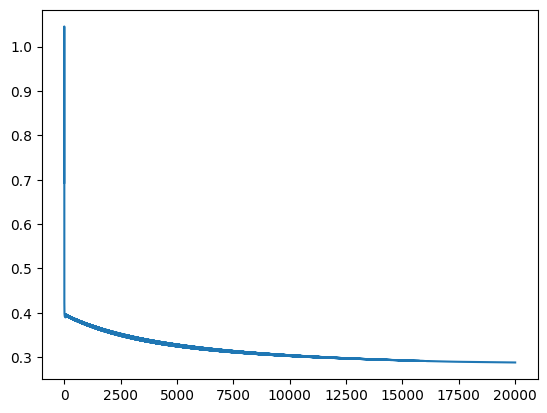

In [107]:
w=np.zeros(X.shape[1])
alpha = 0.01
num_iterations = 20000
w ,cost_history= gradient_descent(w, X, Y, alpha, num_iterations)

# After training, use the hypothesis function to make predictions
predictions = hypothesis(w, X)
plt.plot(cost_history)

In [108]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

binary_predictions = (predictions >= 0.5).astype(int)

print(f"Accuracy: {accuracy_score(Y, binary_predictions) * 100:.2f}%")
print(f"Precision: {precision_score(Y, binary_predictions) * 100:.2f}%")
print(f"Recall: {recall_score(Y, binary_predictions) * 100:.2f}%")
print(f"F1 Score: {f1_score(Y, binary_predictions) * 100:.2f}%")
print(f"AUC-ROC Score: {roc_auc_score(Y, predictions) * 100:.2f}%")


Accuracy: 88.05%
Precision: 68.92%
Recall: 23.83%
F1 Score: 35.42%
AUC-ROC Score: 86.97%


## 2.KNN

In [109]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [110]:
knn.score(x_test,y_test)

0.8525641025641025

In [111]:
from sklearn.metrics import confusion_matrix
y_pred= knn.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
cm
f1_score_knn=f1_score(y_test,y_pred)
print(cm)
print(f1_score_knn)

[[255   4]
 [ 42  11]]
0.32352941176470584


## 3 Decision Tree Classifier

In [112]:
from sklearn import tree

In [113]:
model =tree.DecisionTreeClassifier()

In [114]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [115]:
model.score(x_train,y_train)

1.0

In [116]:
model.score(x_test,y_test)

0.8685897435897436

In [117]:
y_pred=model.predict(x_test)
accuracy =100*model.score(x_test,y_test)
f1_score_decision=f1_score(y_test,y_pred)
print(accuracy)

86.85897435897436


## 4. random forest classifier

In [118]:
from sklearn.ensemble import RandomForestClassifier
model_random=RandomForestClassifier()
model_random.fit(x_train,y_train,)

RandomForestClassifier()

In [119]:
model_random.score(x_test,y_test)

0.8942307692307693

In [120]:
y_pred=model_random.predict(x_test)
f1_score_random=f1_score(y_test,y_pred)
accuracy=100*model_random.score(x_test,y_test)
print(accuracy)
print(f1_score_random)

89.42307692307693
0.5599999999999999


## Part5

## looking at the accuracy of the models which are used for training we can say that Random Forest Classifier is the best training model.

In [121]:
print("Accuracy of logistic regression using sklearn",accuracy_logisticregression*100,"%")
print("Accuracy of logistic regression from scratch",accuracy_score(Y, binary_predictions) * 100,"%")
print("Accuracy using knn",knn.score(x_test,y_test)*100,"%")
print("Accuracy using Decision Trees",model.score(x_test,y_test)*100,"%")
print("Accuracy using Random Forest Classifier",model_random.score(x_test,y_test)*100,"%")

Accuracy of logistic regression using sklearn 85.8974358974359 %
Accuracy of logistic regression from scratch 88.04627249357327 %
Accuracy using knn 85.25641025641025 %
Accuracy using Decision Trees 86.85897435897436 %
Accuracy using Random Forest Classifier 89.42307692307693 %


In [122]:
print("f1_score of logistic regression using sklearn",f1_score_logistic*100,"%")
print("f1_score of logistic regression from scratch",f1_score(Y, binary_predictions) * 100,"%")
print("f1_score using knn",f1_score_knn*100,"%")
print("f1_score using Decision Trees",f1_score_decision*100,"%")
print("f1_score using Random Forest Classifier",f1_score_random*100,"%")

f1_score of logistic regression using sklearn 35.294117647058826 %
f1_score of logistic regression from scratch 35.41666666666667 %
f1_score using knn 32.35294117647059 %
f1_score using Decision Trees 53.93258426966292 %
f1_score using Random Forest Classifier 55.99999999999999 %
